In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5,max_features=0.5)
digits = load_digits()

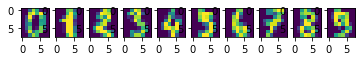

In [3]:
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [4]:
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6878862793572311


In [15]:
list_val=list()
for i in range(0,99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy = clf.score(X_test,y_test) 
    list_val.append(accuracy)

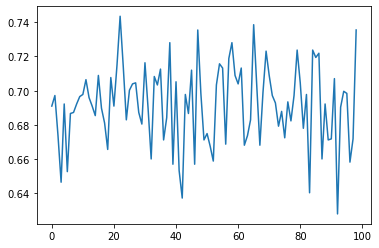

In [16]:
plt.plot(list_val)

In [7]:
ecrtp=np.std(list_val)
print(ecrtp)

0.025986536594139277


In [8]:
model1 = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)

In [9]:
model1.fit(X_train, y_train)
Z = model1.predict(X_test)
accuracy=model1.score(X_test,y_test)

In [10]:
accuracy

0.9122373300370828

In [17]:
list_val_bag=list()
for i in range(0,99):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    model1 = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    model1.fit(X_train, y_train)
    Z = model1.predict(X_test)
    accuracy=model1.score(X_test,y_test)
    list_val_bag.append(accuracy)

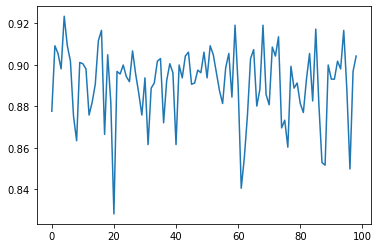

In [18]:
plt.plot(list_val_bag)

In [12]:
var_dect=np.var(list_val)
var_bag=np.var(list_val_bag)

In [13]:
var_bag

0.0003545023453465364

In [14]:
var_dect

0.0006753000841585398

In [32]:
list_val_est=list()
for i in range(2,1000,20):
    model1 = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i)
    model1.fit(X_train, y_train)
    Z = model1.predict(X_test)
    accuracy=model1.score(X_test,y_test)
    list_val_est.append(accuracy)

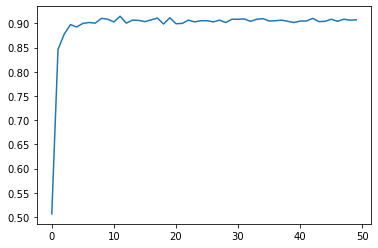

In [33]:
plt.plot(list_val_est)

#on doit choisir un grand nombre d estimateurs(arbres) pour avoir une meilleure accuracy
list_val_est